In [60]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
from imutils import paths
import imutils
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import timeit

# load the saved model
model = load_model('ARhinitisModel')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# predicting images
# import urllib.request
# req = urllib.request.urlopen('http://answers.opencv.org/upfiles/logo_2.png')
# img = image.load_img(req, target_size=(img_width, img_height))
(img_width, img_height) = (224, 224)
img = image.load_img(r'C:/Users/cvpr/Documents/Bishal/Allergic Rhinitis/Dataset/non_rotate/dataset2/1/19_1_00002_right.tif', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images/255, batch_size=10)
print(np.argmax(classes, axis=1))
print(classes)

In [121]:
imagePaths = list(paths.list_images("Dataset/rotate"))
imagePaths

['Dataset/rotate\\dataset0\\0\\n13_1_00002_right.tif',
 'Dataset/rotate\\dataset0\\0\\n13_1_00003_left.tif',
 'Dataset/rotate\\dataset0\\0\\n13_2_00001_right.tif',
 'Dataset/rotate\\dataset0\\0\\n14_1_00001_right.tif',
 'Dataset/rotate\\dataset0\\0\\n14_1_00007_left.tif',
 'Dataset/rotate\\dataset0\\0\\n15_2_00005_left.tif',
 'Dataset/rotate\\dataset0\\0\\n1_1_00001_right.tif',
 'Dataset/rotate\\dataset0\\0\\n6_1_00004_right.tif',
 'Dataset/rotate\\dataset0\\0\\n6_1_00006_left.tif',
 'Dataset/rotate\\dataset0\\1\\14_1_00002_right.tif',
 'Dataset/rotate\\dataset0\\1\\7_1_00001_right.tif',
 'Dataset/rotate\\dataset0\\1\\7_1_00005_left.tif',
 'Dataset/rotate\\dataset0\\2\\2_1_00002_right.tif',
 'Dataset/rotate\\dataset0\\2\\2_1_00005_left.tif',
 'Dataset/rotate\\dataset0\\2\\3_1_00003_left.tif',
 'Dataset/rotate\\dataset0\\2\\4_1_00002_right.tif',
 'Dataset/rotate\\dataset0\\2\\6_1_00001_right.tif',
 'Dataset/rotate\\dataset0\\2\\6_1_00006_left.tif',
 'Dataset/rotate\\dataset1\\0\\n17_4_0

In [117]:
data = []
labels = []
dirList= []

In [118]:
def showImage(images):
    for image in images:
        plt.figure(figsize=(5,5))
        plt.imshow(image)
        plt.show

In [119]:
def center_crop(img, dim):
	"""Returns center cropped image
	Args:
	img: image to be center cropped
	dim: dimensions (width, height) to be cropped
	"""
	width, height = img.shape[1], img.shape[0]

	# process crop width and height for max available dimension
	crop_width = dim[0] if dim[0]<img.shape[1] else img.shape[1]
	crop_height = dim[1] if dim[1]<img.shape[0] else img.shape[0] 
	mid_x, mid_y = int(width/2), int(height/2)
	cw2, ch2 = int(crop_width/2), int(crop_height/2) 
	crop_img = img[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x+cw2]
	return crop_img

7


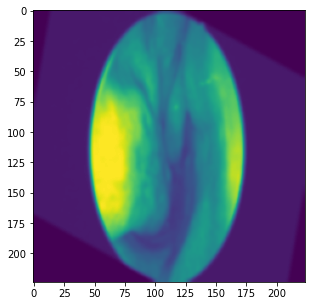

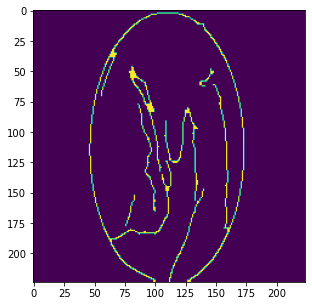

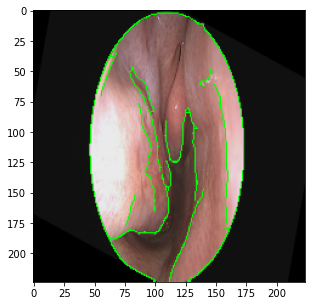

In [120]:
# Formatting data and labels
count = 0
for imagePath in imagePaths:
    # Extract the class label from file name and append to labels
    # 파일 이름에서 클래스 레이블을 추출하고 레이블에 추가함
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)
    # Load the image, swap color channels, and resize it to be a fixed 224x224 pixels while ignoring the aspect ratio
    # 이미지를 로드하고, 컬러 채널을 스왑하고, 가로 세로 비율을 무시하고 고정 224x224 픽셀로 크기를 조정함
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image1 = center_crop(image,(224,224))
    image = cv2.resize(image, (224,224))
    
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (7,7), 0)
    
    edged = cv2.Canny(blur, 10, 100)
    edged = cv2.dilate(edged, None, iterations=1)
    edged = cv2.erode(edged, None, iterations=1)
    
    if not count:
        showImage([blur, edged])
    
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    
    #(cnts, _) = imutils.contours.sort_contours(cnts)
    
    
    if not count:
        cv2.drawContours(image, cnts, -1, (0,255,0), 1)
        showImage([image])
        print(len(cnts))

    
    
    count += 1
    
    
    
    
    # Append to data
    # 데이터에 추가
    data.append(image)

# Convert the data and labels to NumPy arrays while scaling the pixel intensities to the range [0,1]
# 픽셀 강도를 [0,1] 범위로 조정하면서 데이터와 레이블을 NumPy 배열로 변환
data = np.array(data) / 255.0
labels = np.array(labels)

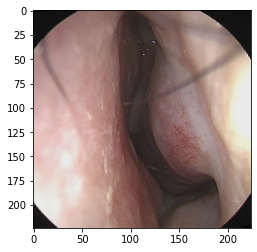

In [109]:
plt.imshow(image1)

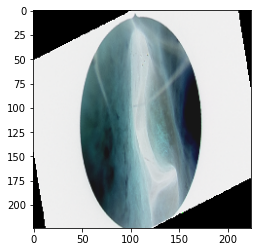

In [88]:
plt.imshow(image[:,:,:3]*255)

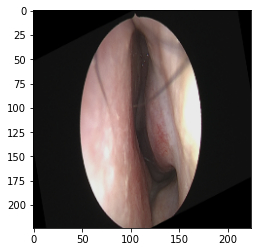

In [94]:
plt.imshow(image)

In [89]:
from skimage import filters as skifilters
from scipy import ndimage
from skimage import filters

In [90]:
def shades_gray(image, njet=0, mink_norm=1, sigma=1):
    """
    Estimates the light source of an input_image as proposed in:
    J. van de Weijer, Th. Gevers, A. Gijsenij
    "Edge-Based Color Constancy"
    IEEE Trans. Image Processing, accepted 2007.
    Depending on the parameters the estimation is equal to Grey-World, Max-RGB, general Grey-World,
    Shades-of-Grey or Grey-Edge algorithm.
    :param image: rgb input image (NxMx3)
    :param njet: the order of differentiation (range from 0-2)
    :param mink_norm: minkowski norm used (if mink_norm==-1 then the max
           operation is applied which is equal to minkowski_norm=infinity).
    :param sigma: sigma used for gaussian pre-processing of input image
    :return: illuminant color estimation
    :raise: ValueError
    
    Ref: https://github.com/MinaSGorgy/Color-Constancy
    """
    gauss_image = filters.gaussian(image, sigma=sigma, multichannel=True)
    if njet == 0:
        deriv_image = [gauss_image[:, :, channel] for channel in range(3)]
    else:   
        if njet == 1:
            deriv_filter = filters.sobel
        elif njet == 2:
            deriv_filter = filters.laplace
        else:
            raise ValueError("njet should be in range[0-2]! Given value is: " + str(njet))     
        deriv_image = [np.abs(deriv_filter(gauss_image[:, :, channel])) for channel in range(3)]
    for channel in range(3):
        deriv_image[channel][image[:, :, channel] >= 255] = 0.
    if mink_norm == -1:  
        estimating_func = np.max 
    else:
        estimating_func = lambda x: np.power(np.sum(np.power(x, mink_norm)), 1 / mink_norm)
    illum = [estimating_func(channel) for channel in deriv_image]
    som   = np.sqrt(np.sum(np.power(illum, 2)))
    illum = np.divide(illum, som)
    return illum


def correct_image(image, illum):
    """
    Corrects image colors by performing diagonal transformation according to 
    given estimated illumination of the image.
    :param image: rgb input image (NxMx3)
    :param illum: estimated illumination of the image
    :return: corrected image
    
    Ref: https://github.com/MinaSGorgy/Color-Constancy
    """
    correcting_illum = illum * np.sqrt(3)
    corrected_image = image / 255.
    for channel in range(3):
        corrected_image[:, :, channel] /= correcting_illum[channel]
    return np.clip(corrected_image, 0., 1.)

In [91]:
# Color Transformations
mx    = correct_image(image, shades_gray(image, njet=0, mink_norm=-1, sigma=0))  # MaxRGB Constancy
gw    = correct_image(image, shades_gray(image, njet=0, mink_norm=+1, sigma=0))  # Gray World Constancy 
hsv   = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)                                   # HSV Color Space
lab   = cv2.cvtColor(image, cv2.COLOR_RGB2Lab)                                   # CIELab Color Space

# Concatenate to Output Image
op    = np.concatenate((gw/255,np.expand_dims(hsv[:,:,0]/179,axis=2),hsv[:,:,1:]/255,
                        np.expand_dims(lab[:,:,0]/255,axis=2),lab[:,:,1:]/128),axis=2)

C:\Users\cvpr\AppData\Local\Temp\ipykernel_73192\164670876.py:19: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  gauss_image = filters.gaussian(image, sigma=sigma, multichannel=True)


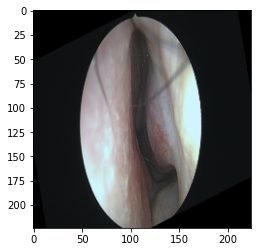

In [129]:
plt.imshow(op[:,:,:3]*255)

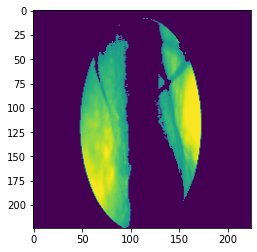

In [98]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  
# applying different thresholding  
# techniques on the input image 
# all pixels value above 120 will  
# be set to 255 

ret, thresh = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO) 

  
# the window showing output images 
# with the corresponding thresholding  
# techniques applied to the input images 
plt.imshow(thresh) 

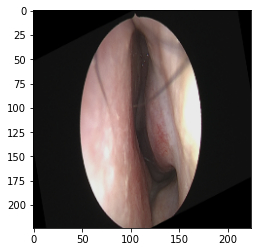

In [101]:
plt.imshow(center_crop(image, (224,224)))

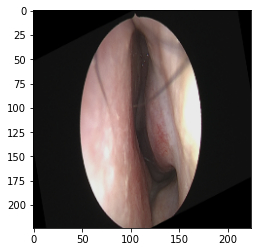

In [102]:
plt.imshow(image)

In [122]:
img = cv2.imread('Dataset/rotate\\dataset0\\0\\n13_1_00002_right.tif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
x, y, w, h = cv2.boundingRect(cnt)
crop = img[y: y + h, x: x + w]
cv2.imwrite('sofwinres.png', crop)

True

In [128]:
def cropImage(img):
    grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,thresholded = cv2.threshold(grayscale, 0, 255, cv2.THRESH_OTSU)
    #cv2.imwrite("otsu.png", thresholded)
    bbox = cv2.boundingRect(thresholded)
    x, y, w, h = bbox
    #print(bbox)
    croppedImg = img[y:y+h, x:x+w]
    return croppedImg

(100, 2, 273, 268)


True